# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
#Seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

**2-A)**

In [4]:
#Seu código aqui
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


**2-B)**

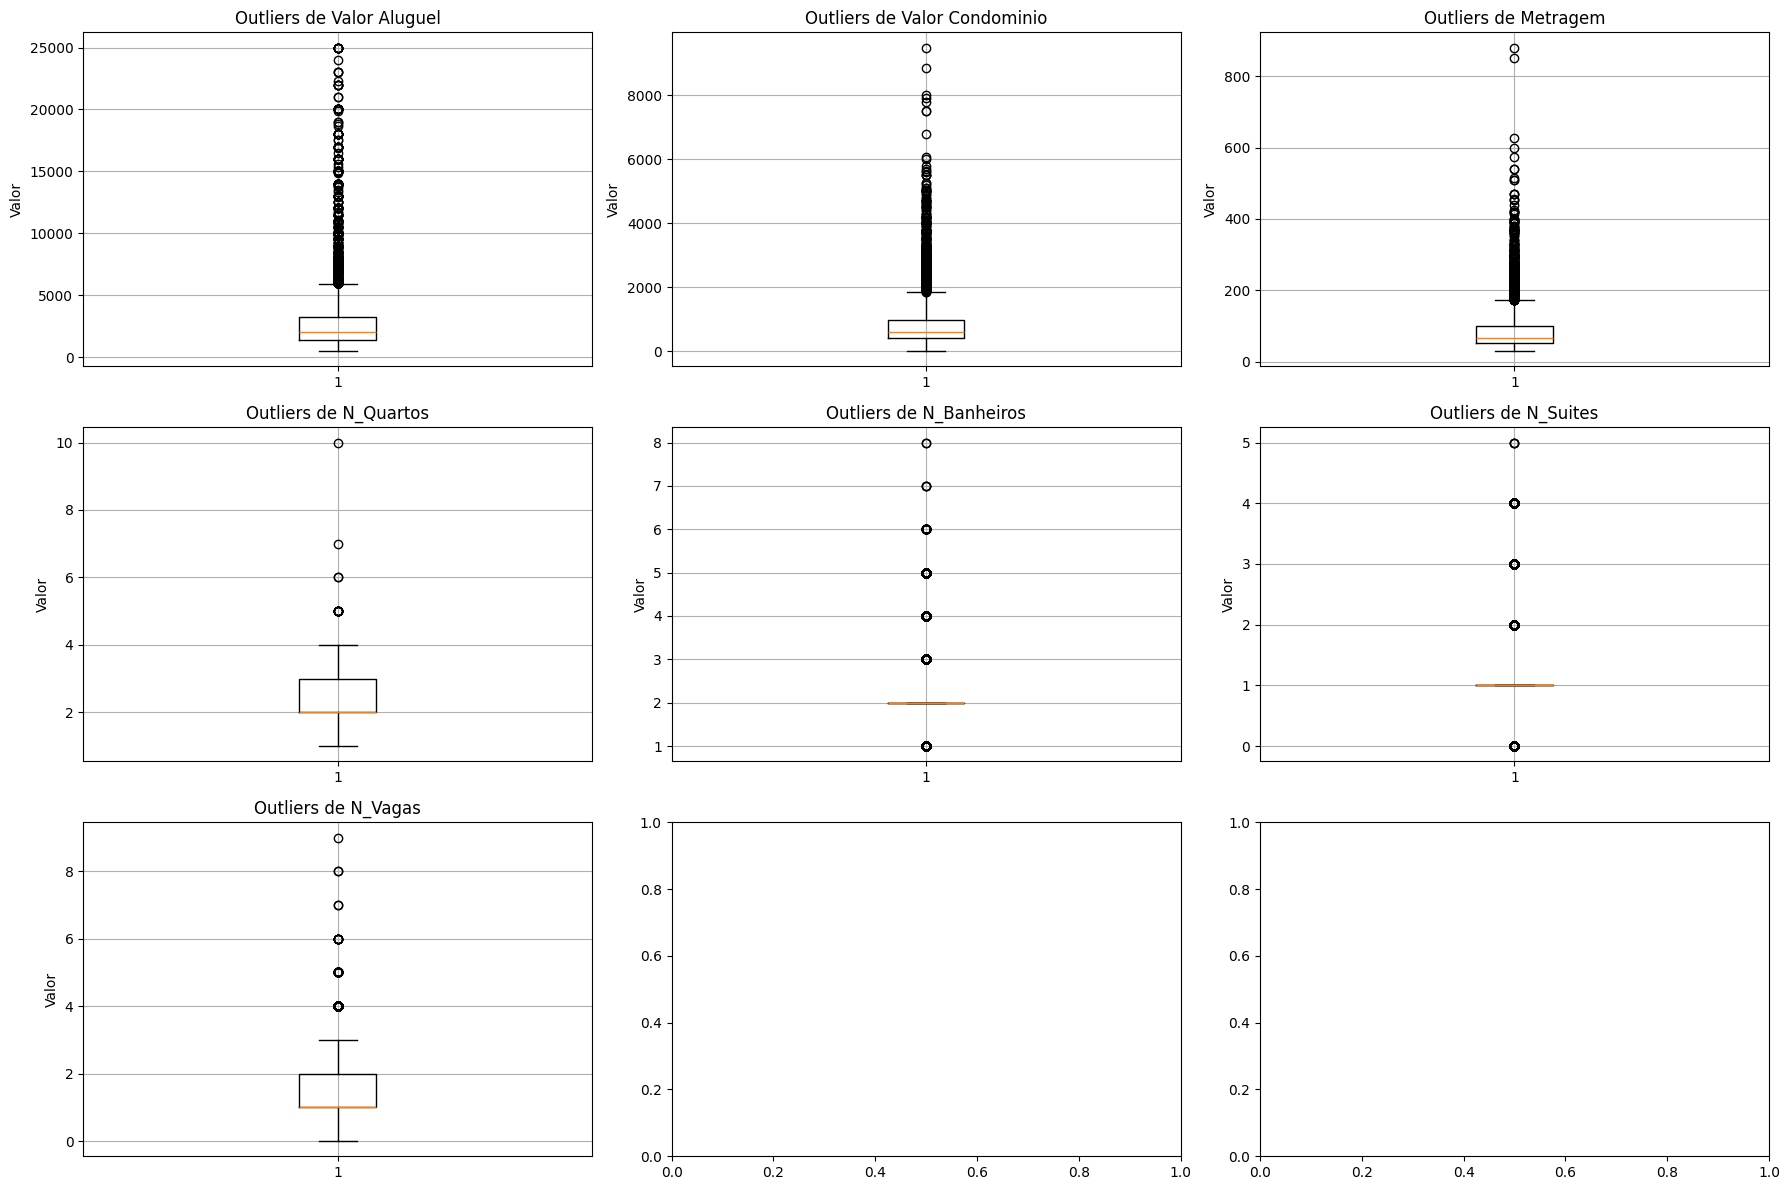

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

axes[0, 0].boxplot(df['Valor_Aluguel'])
axes[0, 0].set_title('Outliers de Valor Aluguel')
axes[0, 0].set_ylabel('Valor')
axes[0, 0].grid(True)  # Corrigido

axes[0, 1].boxplot(df['Valor_Condominio'])
axes[0, 1].set_title('Outliers de Valor Condominio')
axes[0, 1].set_ylabel('Valor')
axes[0, 1].grid(True)  # Corrigido

axes[0, 2].boxplot(df['Metragem'])
axes[0, 2].set_title('Outliers de Metragem')
axes[0, 2].set_ylabel('Valor')
axes[0, 2].grid(True)  # Corrigido

axes[1, 0].boxplot(df['N_Quartos'])
axes[1, 0].set_title('Outliers de N_Quartos')
axes[1, 0].set_ylabel('Valor')
axes[1, 0].grid(True)  # Corrigido

axes[1, 1].boxplot(df['N_banheiros'])
axes[1, 1].set_title('Outliers de N_Banheiros')
axes[1, 1].set_ylabel('Valor')
axes[1, 1].grid(True)  # Corrigido

axes[1, 2].boxplot(df['N_Suites'])
axes[1, 2].set_title('Outliers de N_Suites')
axes[1, 2].set_ylabel('Valor')
axes[1, 2].grid(True)  # Corrigido

axes[2, 0].boxplot(df['N_Vagas'])
axes[2, 0].set_title('Outliers de N_Vagas')
axes[2, 0].set_ylabel('Valor')
axes[2, 0].grid(True)  # Corrigido

plt.tight_layout()
plt.show()

In [6]:


# Formula do Outlier
q1 = df['Valor_Aluguel'].quantile(0.25)
q3 = df['Valor_Aluguel'].quantile(0.75)
iqr = q3 - q1

# Limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtra os outliers
outliers = df[(df['Valor_Aluguel'] < limite_inferior) | (df['Valor_Aluguel'] > limite_superior)]

# Calcula a porcentagem
percentual_outliers = (len(outliers) / len(df)) * 100

print(f"Quantidade de outliers: {len(outliers)}")
print(f"Percentual de outliers: {percentual_outliers:.2f}%")



Quantidade de outliers: 749
Percentual de outliers: 10.40%


In [7]:
# Optei por excluir os outlier por se tratar de apenas 10% de todos o dataframe. 
# Observação, ainda vou verificar se tem mais outliers significativos em outras colunas.

df_sem_outliers = df[(df['Valor_Aluguel'] >= limite_inferior ) & (df['Valor_Aluguel'] <= limite_superior)]




**C)** Analise bivaridada

In [8]:
# Optei por nao fazer analise bivariada, pois todo as colunas do DF esta com valor inteiro, sendo assim  
# o grafico de correlação a seguir já trará Os insights que preciso em relacação a correlação entre eles.  

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [9]:
#Seu código aqui

corr = df_sem_outliers.corr(numeric_only=True)

# Plotando com plotly
fig = px.imshow(
    corr.values,
    labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
    x=corr.columns,
    y=corr.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)

# Ajustes de layout
fig.update_layout(
    title='Mapa de Correlação Interativo',
    width=1000,
    height=800,
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10))
)

fig.show()


**3_A)** Aqui percebo que, metragem X Valor_Condominio e N_Suites X N_Banheiros tem correlação significativa. 


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [10]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test: ", y_test.shape)


Shape X_train: (5762, 6)
Shape X_test:  (1441, 6)
Shape y_train: (5762,)
Shape y_test:  (1441,)


Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [11]:
# Seu código aqui

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [12]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [13]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [14]:
#Seu código Aqui

b0 = modelo.intercept_
b1 = modelo.coef_[0]

print("Intercepto (b0):", b0)
print("Coeficiente (b1):", b1)

# 4 - Montar a equação da reta
print(f"Equação da reta: Valor_Aluguel = {b0:.2f} + {b1:.2f} * Metragem")


Intercepto (b0): -96.99896039932219
Coeficiente (b1): 34.473970893248726
Equação da reta: Valor_Aluguel = -97.00 + 34.47 * Metragem


Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [15]:
#Seu código aqui

# Calcula o R² no conjunto de treinamento
r2_treino = modelo.score(X, y)

print(f"R² (treinamento): {r2_treino:.4f}")


R² (treinamento): 0.5214


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

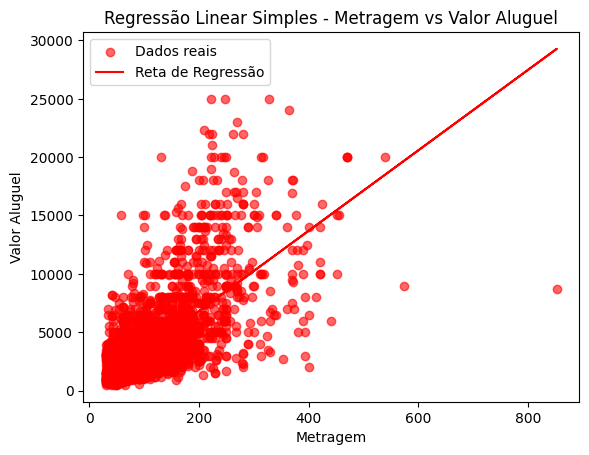

In [16]:
# Seu código aqui

y_pred = modelo.predict(X)

plt.Figure(figsize=(8,5))
plt.scatter(X,y, color='red', label = 'Dados reais', alpha=0.6)

#Linha de Regressão 

plt.plot(
    X,
    y_pred,
    color = 'red',
    label = 'Reta de Regressão'
)

plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.title('Regressão Linear Simples - Metragem vs Valor Aluguel')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [17]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [18]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)
print("Coeficiente de Determinação (R²) nos Dados de Treino", r2_treino)

r2_test_simples = r2
r2_treino_simples = r2_treino

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697
Coeficiente de Determinação (R²) nos Dados de Treino 0.521363231851778


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

**R:** o R² do treino esta levemente menor que o R² do teste. indicamento que está subajustado.


# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [19]:
#seu código aqui
X = df_sem_outliers.drop(columns='Valor_Aluguel')
y = df_sem_outliers['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [20]:
#seu código aqui

modelo = LinearRegression()
modelo.fit(X_train,y_train)


LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [21]:
#seu código aqui
r2 = modelo.score(X_train, y_train)
print("Coeficiente R² de treino", r2)
r2_treino_multi = r2

Coeficiente R² de treino 0.4169698975156124


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [22]:
#seu código aqui

r2_test = modelo.score(X_test, y_test)
print ("Coeficiente R² de teste", r2_test)
r2_test_multi = r2_test

Coeficiente R² de teste 0.43639024103962887


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

In [23]:
print(f"Coeficiente R² Treino simples: {r2_treino_simples} e Teste simples {r2_test_simples}")
print(f"Coeficiente R² Treino multiplo: {r2_treino_multi} e Teste multiplo {r2_test_multi}")


Coeficiente R² Treino simples: 0.521363231851778 e Teste simples 0.5697993791211697
Coeficiente R² Treino multiplo: 0.4169698975156124 e Teste multiplo 0.43639024103962887


Digite sua resposta aqui

**R)** - Na regressão linear o R² é maior, porém a a diferença dos coficientes entre treino e teste é maior, já a regressão multipla possui o R² menor, mas a divergência entre treino e teste é menor, dando a entender que o modelo esta mais ajustado. Acredito que a regressão linear nesse caso é melhor por posuir uma previsão maior que a multipla, acredio que a regressão multipla apresenta um score menor devido a inclusão de colunas com correlação baixa. Sendo assim acredito que seria ideal, fazer um regressão multipla porém filtrar e deixar apenas colunas que tenham correlação significante.